In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# 11.1.1 Standard distributions

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 432x288 with 0 Axes>

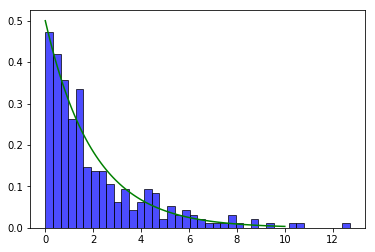

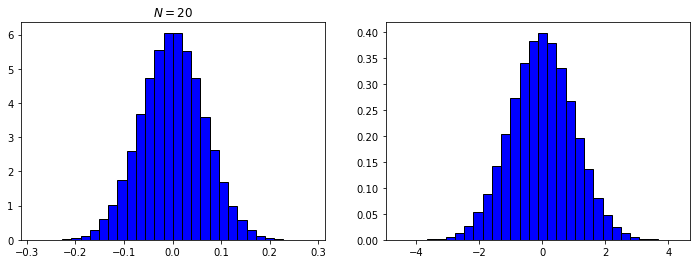

<Figure size 432x288 with 0 Axes>

In [2]:
# Exponential distribution
N = 100
lambda_ = 0.5
y = np.linspace(0, 10, N)
py = lambda_*np.exp(-lambda_*y)
plt.figure()
plt.plot(y,py,c='green')

z = np.random.uniform(0,1,3*N)
yz = -1/lambda_*np.log(1-z)
pyz = lambda_*np.exp(-lambda_*yz)
# plt.scatter(yz,pyz,marker='o', s=50, c='',edgecolors='blue')
plt.hist(yz, bins=40,normed=1,color='blue',edgecolor="black",alpha=0.7)

# Gaussian distribution
n = 100000
N = 20
X = np.zeros([N, n])
for i in range(N):
    X[i,:] = np.random.uniform(low = 0, high = 1, size = n)
    
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.hist(X.mean(axis=0)-.5, bins=30, normed=1, facecolor='b', edgecolor='black')
plt.title('$N = 20$')

x1 = np.random.uniform(0,1,n)
x2 = np.random.uniform(0,1,n)
y1 = np.sqrt(-2*np.log(x1)) * np.cos(2*np.pi*x2)
y2 = np.sqrt(-2*np.log(x1)) * np.sin(2*np.pi*x2)
y = np.r_[y1,y2]
plt.subplot(1,2,2)
plt.hist(y,bins=30, normed=1, facecolor='b', edgecolor='black')
plt.figure()

# 11.1.2 Rejection sampling

(array([5.24427530e-04, 5.24427530e-04, 5.24427530e-04, 0.00000000e+00,
        0.00000000e+00, 5.24427530e-04, 5.24427530e-04, 1.57328259e-03,
        0.00000000e+00, 2.09771012e-03, 1.04885506e-03, 2.09771012e-03,
        1.04885506e-03, 2.09771012e-03, 4.19542024e-03, 4.19542024e-03,
        3.67099271e-03, 8.39084049e-03, 6.29313037e-03, 6.81755790e-03,
        6.29313037e-03, 1.20618332e-02, 1.04885506e-02, 1.94038186e-02,
        1.88793911e-02, 1.78305360e-02, 1.83549636e-02, 2.09771012e-02,
        2.46480939e-02, 2.41236664e-02, 3.61854996e-02, 3.67099271e-02,
        4.35274850e-02, 4.24786300e-02, 4.82473328e-02, 4.24786300e-02,
        5.50648907e-02, 5.76870284e-02, 8.02374122e-02, 8.23351223e-02,
        9.75435207e-02, 8.39084049e-02, 8.54816875e-02, 1.10129781e-01,
        1.12751919e-01, 1.22191615e-01, 1.22716042e-01, 1.46839709e-01,
        1.40546578e-01, 1.44217571e-01, 1.49986274e-01, 1.65719100e-01,
        1.77780933e-01, 1.77256505e-01, 1.93513759e-01, 2.171129

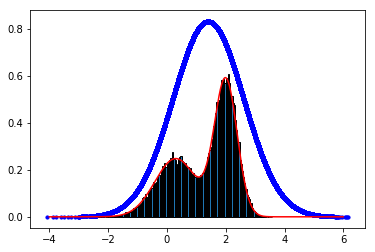

In [4]:
def f1(x):
    return (0.3*np.exp(-(x-0.3)**2) + 0.7* np.exp(-(x-2.)**2/0.3))/1.2113
x = np.arange(-4.,6.,0.01)
plt.figure()
plt.plot(x,f1(x),color = "red")

size = int(1e+05)
sigma = 1.2
z = np.random.normal(loc = 1.4,scale = sigma, size = size)
qz = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*(z-1.4)**2/sigma**2)
k = 2.5
plt.scatter(z,k*qz,marker='o',c='blue',s=10)
#z = np.random.uniform(low = -4, high = 6, size = size)
#qz = 0.1
#k = 10
u = np.random.uniform(low = 0, high = k*qz, size = size)

pz =  0.3*np.exp(-(z-0.3)**2) + 0.7* np.exp(-(z-2.)**2/0.3)
sample = z[pz >= u]
plt.hist(sample,bins=150, normed=True, edgecolor='black')

Text(2.7, 0.5, '$kq(z)$')

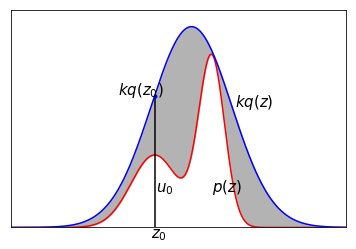

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return 0.3*np.exp(-(x-0.3)**2) + 0.7* np.exp(-(x-2.)**2/0.3)
def f2(x):
    sigma =1.2
    return 2.5/(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5*(x-1.4)**2/sigma**2)
x = np.arange(-4.,6.,0.01)

plt.plot(x,f1(x),color = "red")
plt.plot(x,f2(x),color = "blue")
plt.xticks([])
plt.yticks([])
plt.ylim(0,0.9)
plt.xlim(-4,6)
plt.plot([0.3,0.3],[0,0.54601532],color = "black")
plt.plot(0.3,0.54601532,'b.')
plt.fill_between(x,f1(x),f2(x),color = (0.7,0.7,0.7))
plt.annotate('$z_0$',xy=(0.,0),xytext=(0.2,-0.04),fontsize=15)
plt.annotate('$u_0$',xy=(0.,0.),xytext=(0.35,0.15),fontsize=15)
plt.annotate('$kq(z_0)$',xy=(0.,0.),xytext=(-0.8,0.55),fontsize=15)
plt.annotate('$p(z)$',xy=(0.,0.),xytext=(2,0.15),fontsize=15)
plt.annotate('$kq(z)$',xy=(0.,0.),xytext=(2.7,0.5),fontsize=15)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Reject Sampling for Beta(3,6) Histogram')

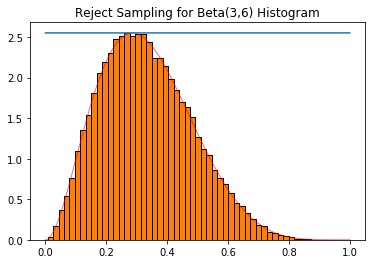

In [9]:
from scipy.stats import beta
# beta distribution with shape parameter a=3,b=6
a=3
b=6

# just show max value should be at 2.0/7 and max value is ceilled to 2 decimal points
beta_max = round(beta.pdf(2.0/7,a,b) + 0.005, 2)

# plot beta distribution
x = np.linspace(0.0,1.0,50000*beta_max)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=1, alpha=0.6, label='beta pdf')
plt.plot(x,(np.ones(len(x)) * beta_max).tolist())

# random sampling 50000 on uniform in [0,1)
uni_samples = np.random.uniform(0.0,1.0,int(50000*beta_max))
# calculate "accept probability" = beta.pdf(x) / beta_max
# then do another uniform sample, if sample < beta.pdf(x) / beta_max,
# we accept the x as an sample from beta(3,6).
beta_samples = uni_samples[np.random.uniform(0.0,1.0,len(x)) < beta.pdf(uni_samples,a,b) / beta_max]

plt.hist(beta_samples, bins=50,normed=True,edgecolor='black')
plt.title("Reject Sampling for Beta(3,6) Histogram")

(array([2.07542431, 2.07542431, 2.42132836, 1.51333023, 2.33485235,
        2.07542431, 1.9889483 , 1.85923428, 1.3403782 , 2.20513833,
        1.85923428, 1.64304425, 2.07542431, 1.51333023, 1.47009222,
        1.68628225, 1.51333023, 1.68628225, 1.68628225, 1.08095016,
        1.59980624, 1.2971402 , 1.85923428, 1.81599627, 1.81599627,
        1.3403782 , 1.64304425, 1.08095016, 1.85923428, 1.81599627,
        0.99447415, 1.81599627, 1.72952026, 1.59980624, 1.59980624,
        1.68628225, 1.59980624, 1.25390219, 1.64304425, 1.38361621,
        1.25390219, 1.16742618, 1.3403782 , 1.2971402 , 1.21066418,
        1.38361621, 1.16742618, 1.51333023, 1.42685421, 1.21066418,
        1.55656823, 1.2971402 , 1.03771216, 1.12418817, 0.99447415,
        0.90799814, 1.21066418, 1.38361621, 1.51333023, 1.12418817,
        1.08095016, 1.16742618, 1.16742618, 1.21066418, 1.21066418,
        0.95123614, 1.38361621, 1.16742618, 0.90799814, 0.99447415,
        1.12418817, 1.47009222, 0.99447415, 0.95

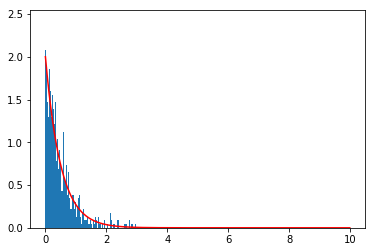

In [10]:
# Inverse CDF
maxCnt = 5000
Lambda = 2
ys = []
standardXaxis = []
standardExp = []
for i in range(maxCnt):
    u = np.random.random()
    y = -1/Lambda*np.log(1-u) #F-1(X)
        
    ys.append(y)
    
for i in range(1000):
    t = Lambda * np.exp(-Lambda*i/100)
    standardXaxis.append(i/100)
    standardExp.append(t)
plt.plot(standardXaxis,standardExp,'r')
plt.hist(ys,1000,normed=True)

# 11.1.5 Sampling-importance-resampling

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.01467444, 0.        , 0.04402331, 0.02201166, 0.08070941,
        0.04402331, 0.08070941, 0.05136053, 0.1173955 , 0.18343047,
        0.16875604, 0.11005828, 0.16141882, 0.12473272, 0.1540816 ,
        0.13940716, 0.05136053, 0.09538385, 0.05136053, 0.09538385,
        0.07337219, 0.01467444, 0.04402331, 0.06603497, 0.1173955 ,
        0.11005828, 0.1540816 , 0.12473272, 0.22745379, 0.35218651,
        0.34484929, 0.34484929, 0.35952373, 0.44757035, 0.45490757,
        0.44757035, 0.4255587 , 0.31550041, 0.27881432, 0.24212822,
        0.19076769, 0.1173955 , 0.08804663, 0.05869775, 0.07337219,
        0.02934888, 0.00733722, 0.01467444, 0.00733722, 0.01467444]),
 array([-1.67299083, -1.53669941, -1.40040799, -1.26411656, -1.12782514,
        -0.99153372, -0.8552423 , -0.71895088, -0.58265945, -0.44636803,
        -0.31007661, -0.17378519, -0.03749377,  0.09879766,  0.23508908,
         0.3713805 ,  0.50767192,  0.64396334,  0.78025477,  0.91654619,
         1.05283761,  1.18

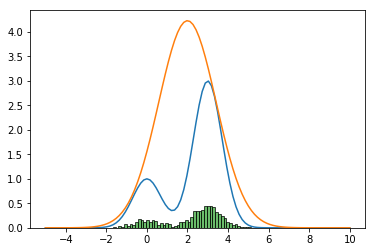

In [14]:
def func(x):
    return np.exp(-x**2)+3*np.exp(-(x-3)**2)
def gaussian_pdf(x, mu, var):
    p = 1/np.sqrt(2*np.pi*var)*np.exp(-.5*(x-mu)**2/var)
    return p

x = np.linspace(-5, 10, 100)
mu = np.array([2.])
var = np.array([2.])

plt.plot(x, func(x), label = r"$\tilde{p}(z)$")
plt.plot(x, 15*gaussian_pdf(x, mu, var))

sigma = 1.2
z = np.random.normal(2, sigma, int(1e4))
qz = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-.5*(z-2)**2/sigma**2)
weight = func(z)/gaussian_pdf(z, mu, sigma**2)
weight /= np.sum(weight)
idx = np.random.choice(int(1e4), int(1e3), p = weight)
sample = z[idx]
plt.hist(sample, bins=50, normed=True, alpha = .7, edgecolor='black')

# 11.2 Markov Chain Monte Carlo

PI is  [3.158]


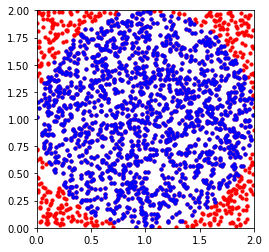

In [2]:
N = 2e3
x = np.random.uniform(0, 2, [int(N), 2])
center = np.array([1,1]).reshape(-1,2)
d = cdist(x, center)
pi = sum(d<=1)/N*4
print("PI is ", pi)
plt.figure()
plt.scatter(x[:,0], x[:,1], c='red', s=10)
plt.scatter(x[(d<=1).flatten(), 0], x[(d<=1).flatten(), 1], c = 'blue', s=10)
plt.xlim(0, 2.)
plt.ylim(0,2.)
plt.gca().set_aspect('equal', adjustable='box')

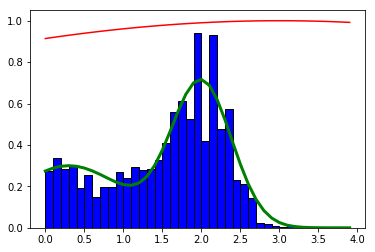

In [15]:
# my own try 
import scipy.stats
mu = 3
sigma = 10
def qsample():
    return np.random.normal(mu,sigma)
def q(x):
    return np.exp(-(x-mu)**2/(sigma**2))
def p(x):
    """目标分布"""
    return 0.3*np.exp(-(x-0.3)**2) + 0.7* np.exp(-(x-2.)**2/0.3)
def hm(n=10000):
    sample = np.zeros(n)
    sample[0] = 0.5
    for i in range(n-1):
        q_s = qsample()
        u = np.random.rand()
        if u < min(1, (p(q_s)*q(sample[i]))/(p(sample[i])*q(q_s))):
            sample[i+1] = q_s
        else:
            sample[i+1] = sample[i]
    return sample

x = np.arange(0,4,0.1)
realdata = p(x)
N=10000
sample = hm(N)
plt.plot(x,realdata,'g',lw=3)
plt.plot(x,q(x),'r')
plt.hist(sample,bins=x,normed=1,fc='blue',edgecolor='black')
plt.show()

# 11.2.2 The Metropolis-Hastings algorithm

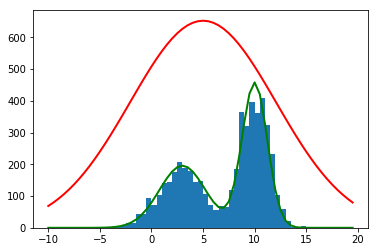

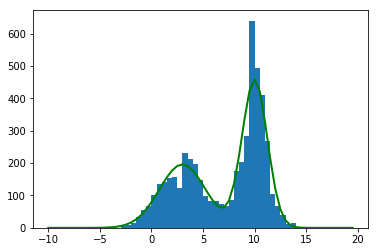

In [8]:
def p(x):
    mu1 = 3
    mu2 = 10
    v1 = 10
    v2 = 3
    return 0.3*np.exp(-(x-mu1)**2/v1) + 0.7* np.exp(-(x-mu2)**2/v2)

def q(x):
    mu = 5
    sigma = 10
    return np.exp(-(x-mu)**2/(sigma**2))

stepsize = 0.5
x = np.arange(-10,20,stepsize)
px = np.zeros(np.shape(x))
for i in range(len(x)):
    px[i] = p(x[i])
N = 5000

# independence chain
u = np.random.rand(N)
mu = 5
sigma = 10
y = np.zeros(N)
y[0] = np.random.normal(mu,sigma)
for i in range(N-1):
    ynew = np.random.normal(mu,sigma)
    alpha = min(1,p(ynew)*q(y[i])/(p(y[i])*q(ynew)))
    if u[i] < alpha:
        y[i+1] = ynew
    else:
        y[i+1] = y[i]

# random walk chain
u2 = np.random.rand(N)
sigma = 10
y2 = np.zeros(N)
y2[0] = np.random.normal(0,sigma)
for i in range(N-1):
    y2new = y2[i] + np.random.normal(0,sigma)
    alpha = min(1,p(y2new)/p(y2[i]))
    if u2[i] < alpha:
        y2[i+1] = y2new
    else:
        y2[i+1] = y2[i]

plt.figure(1)
nbins = 30
plt.hist(y, bins = x)
plt.plot(x, px*N/sum(px), color='g', linewidth=2)
plt.plot(x, q(x)*N/sum(px), color='r', linewidth=2)

plt.figure(2)
nbins = 30
plt.hist(y2, bins = x)
plt.plot(x, px*N/sum(px), color='g', linewidth=2)

# 11.3 Gibbs Sampling

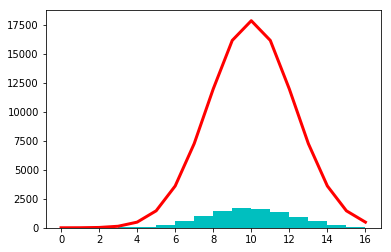

In [10]:
def pXgivenY(y,m1,m2,s1,s2):
    return np.random.normal(m1 + (y-m2)/s2,s1)

def pYgivenX(x,m1,m2,s1,s2):
    return np.random.normal(m2 + (x-m1)/s1,s2)

def gibbs(N=5000):
    k=20
    x0 = np.zeros(N,dtype=float)
    m1 = 10
    m2 = 20
    s1 = 2
    s2 = 3
    for i in range(N):
        y = np.random.rand(1)
        # 每次采样需要迭代 k 次
        for j in range(k):
            x = pXgivenY(y,m1,m2,s1,s2)
            y = pYgivenX(x,m1,m2,s1,s2)
        x0[i] = x
    
    return x0

def f(x):
    """目标分布"""
    return np.exp(-(x-10)**2/10)

# 画图
N=10000
s=gibbs(N)
x1 = np.arange(0,17,1)
plt.hist(s,bins=x1,fc='c')
px1 = np.zeros(len(x1))
for i in range(len(x1)):
    px1[i] = f(x1[i])
plt.plot(x1, px1*N*10/sum(px1), color='r',linewidth=3)
